# Project 2 - Classification and Regression

Team Members:
* Jeff Weltman
* Jordan Kassof
* Kevin Dickens

In [1]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 1. Data Preparation 
## Preparing Target Variables



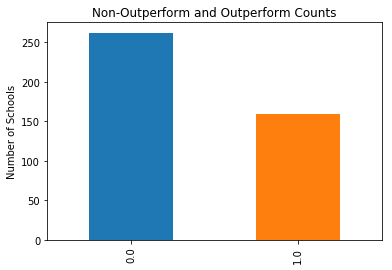

0.0    262
1.0    159
Name: sat_high_level, dtype: int64

In [2]:
import numpy as np
import pandas as pd
 #hs_2017 = pd.read_csv("https://github.com/jeffweltman/MSDS7331/raw/master/hs_2017.csv",index_col=0)#hs_201 
hs_2017 = pd.read_csv("hs_2017.csv")
y = hs_2017.sat_high_level.values
hs_2017.sat_high_level.value_counts().plot(kind='bar')
plt.title("Non-Outperform and Outperform Counts")
plt.ylabel("Number of Schools")
plt.show()
hs_2017.sat_high_level.value_counts()

In our regression task, we will be predicting the 5-year graduation rate.  This 

d:\programfiles\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


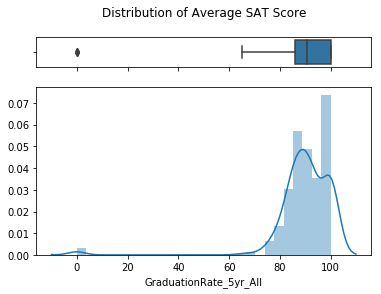

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part

box = sns.boxplot(hs_2017["GraduationRate_5yr_All"], ax=ax_box)
dist = sns.distplot(hs_2017["GraduationRate_5yr_All"], ax=ax_hist)

box.set_title("Distribution of Average SAT Score\n")

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize the data to a more normally distributed data
scaler = StandardScaler()
scaler.fit(hs_2017)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part

box = sns.boxplot(hs_2017["GraduationRate_5yr_All"], ax=ax_box)
dist = sns.distplot(hs_2017["GraduationRate_5yr_All"], ax=ax_hist)

box.set_title("Distribution of Average SAT Score\n")

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.show()

# 2. Data Preparation
## Final Dataset

Our two tasks require slightly different treatment

In [3]:
x = hs_2017.drop(columns=['nc_district', 'sat_high_level', "sat_avg_score_num"])

# 3. Modeling and Evaluation 1
## Evaluation Metrics

*Root Mean Squared Error* (RMSE) was utilized as our primary regression models' scoring criterion. This represented the degree to which our predicted model deviated from the actual data. It is widely used in regression task as a measurement of variance between the predicted and actual data and was therefore deemed the most appropriate metric for our regression tasks. RMSE is considered appropriate to represent model performance when the error distribution is normally distributed. 

For classification, we opted to use precision as our scoring metric. As we sought to most accurately predict whether a school would overperform on average SAT score, we concluded that minimizing false positives would be of greatest value. The cost of mis-classifying a school as not overperforming when they were, in fact, overperforming was deemed lower than the alternative.

# 4. Modeling and Evaluation 2
## Data Sampling Methodology

For the regression tasks, we employed the ShuffleSplit cross-validation with 10 folds to thoroughly randomize our sampling. We found that a 60/40 train/test split yielded the best results for each of our regression tasks.  
  
As the classification task's response variable is binary and not balanced - although, as mentioned above, the imbalance was not anticipated to be cause for concern - we used StratifiedShuffleSplit for classification. This ensured that each of the 10 folds would include an overperforming and non-overperforming school. Best results for this stratified 10-fold cross-validation included an 80/20 train-test split.

# 5. Modeling and Analysis
## Classification Task

Below we define a custom Classification Evaluation function, [created by Dr. Jake Drew](https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Models/2017ComparingSegregatedHighSchoolCampuses.ipynb), to efficiently determine a given model's accuracy, precision, and recall.  
We will utilize this function to assess model performance in classifying whether a school is or is not overperforming.

In [4]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X_Class, Y_Class, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X_Class, Y_Class, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(Y,predictions)
    confMat = confusion_matrix(Y,predictions)
    acc = accuracy_score(Y,predictions)
    
    print(classReport)
    print(confMat)
    print(acc)


To avoid overwriting the regression-specific variables, we'll define X and Y separately for Classification.

In [5]:
Y_sat_high=hs_2017['sat_high_level']
Y_Class = Y_sat_high
X_Class=x = hs_2017.drop(columns = ['nc_district', 'sat_high_level', "sat_avg_score_num"])

### Logistic Regression

Logistic Regression is a common form of classification for dichotomous variables.  It performs the predictive analysis by estimating the log odds of an event and assigning a binary 1 or 0 dependant upon those log odds.  For logistic regression to effectively classify these values the data shouldn't contain large outliers and no multicollinearity should be present amongst the predictors.

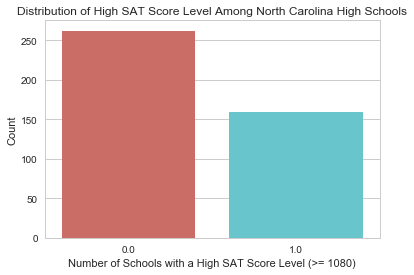

0.0    262
1.0    159
Name: sat_high_level, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

hs_2017 = pd.read_csv("https://github.com/jeffweltman/MSDS7331/raw/master/hs_2017.csv",index_col=0)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Evaluate our variable to be predicted
sns.countplot(x='sat_high_level',data=hs_2017, palette='hls')
plt.xlabel('Number of Schools with a High SAT Score Level (>= 1080)')
plt.ylabel('Count')
plt.title('Distribution of High SAT Score Level Among North Carolina High Schools')
plt.show()
hs_2017['sat_high_level'].value_counts()

  Here we can see the true distribution of the binary variables we seek to classify with this logistic regression.  As noted in the figure, the number of schools with a high SAT score (>=1080) is substantially lower than those with lower scores.

In [ ]:
from sklearn.preprocessing import StandardScaler

#Assigning predicated values and dropping them from test/train set
Y=hs_2017['sat_high_level'].values
hs_2017=hs_2017.drop({'sat_high_level','sat_avg_score_num','lea_sat_avg_score_num'}, axis=1) 
X_highSchools=hs_2017

# Standardize the data to a more normally distributed data
scaler = StandardScaler()
scaler.fit(X_highSchools)

Standard scaler is used herer in order to standardize the data and seeks to create a more normally distributed dataset.

In [8]:
#Divide data into test and training splits
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

Stratified Shuffle split was used here to ensure that the splits represented the data by preserving the same percentage of each target class.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

#create a pipeline to scale all of the data and perform logistic regression during each grid search step.
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Define a range of hyper parameters for grid search
parameters = { 'logisticregression__penalty':['l2']
              ,'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'logisticregression__class_weight': ['balanced','none']
              ,'logisticregression__random_state': [0]
              ,'logisticregression__solver': ['lbfgs']
              ,'logisticregression__max_iter':[100,500]
             }

#Perform the grid search using accuracy as a metric during cross validation.
grid = GridSearchCV(pipe, parameters, cv=cv, scoring='accuracy')

#Use the best features from recursive feature elimination during the grid search
grid.fit(X_highSchools, Y)

#display the best pipeline model identified during the grid search
grid.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False))])

In [11]:
EvaluateClassifierEstimator(grid.best_estimator_, X_highSchools, Y, cv)

The average accuracy for all cv folds is: 			 0.87059
The average precision for all cv folds is: 			 0.7981
The average recall for all cv folds is: 			 0.88438
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.870588,0.783784,0.90625
1,0.811765,0.710526,0.84375
2,0.894118,0.848485,0.87500
3,0.882353,0.823529,0.87500
4,0.894118,0.794872,0.96875
5,0.882353,0.823529,0.87500
6,0.929412,0.882353,0.93750
7,0.858824,0.812500,0.81250
8,0.858824,0.794118,0.84375
9,0.823529,0.707317,0.90625


The final results show the logistic regression performing admirably for accuracy and recall with both scores ranging in the upper 80s.  However precision, which we are most interested in for this task, is considerably lower. Presumably this is due to the model over-predicting the a TRUE for high SAT performance.

### K Nearest Neighbors

K-Neighbors classifiers measure the distance between points according to a supplied distance metric. Once that distance is calculated, the nearest points - a number of which is identified by the variable *k* - are compared with the current point.  
  
We utilized a cross-validated GridSearch to obtain the best combination of parameters out of 290 potential models.

In [12]:
#KNN 10-fold cross-validation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import jaccard
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

class_cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

knc = KNeighborsClassifier(n_neighbors=5)
knn_pipe = make_pipeline(StandardScaler(), knc)


k_range = list(range(1, 30))
metrics = ['euclidean','chebyshev','manhattan','minkowski','jaccard']
weights_options = ['uniform','distance']

knn_parameters = {'kneighborsclassifier__n_neighbors': k_range,'kneighborsclassifier__weights': weights_options, 'kneighborsclassifier__metric': metrics}

#Create a grid search object using the defined parameters

kGridSearch = GridSearchCV(knn_pipe,param_grid=knn_parameters,n_jobs=4,verbose=1,cv=class_cv,scoring='precision')

#Perform hyperparameter search to find the best combination of parameters for our data
kGridSearch.fit(X_Class, Y_Class)

Fitting 10 folds for each of 290 candidates, totalling 2900 fits


[Parallel(n_jobs=4)]: Done  54 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 354 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 1100 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done 2500 tasks      | elapsed:   46.6s
[Parallel(n_jobs=4)]: Done 2900 out of 2900 | elapsed:   56.8s finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'kneighborsclassifier__weights': ['uniform', 'distance'], 'kneighborsclassifier__metric': ['euclidean', 'chebyshev', 'manhattan', 'minkowski', 'jaccard']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=1)

We then examine our best estimator to validate (sanity check) the chosen parameters.

In [13]:
#Diplay the top model parameters
# kGridSearch.best_params_
kGridSearch.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='uniform'))])

With our best estimator in hand, we will evaluate the model's accuracy, precision, and recall. As was stated above, *precision* is our chosen scoring method.

In [14]:
EvaluateClassifierEstimator(kGridSearch.best_estimator_, X_Class, Y_Class, class_cv)

The average accuracy for all cv folds is: 			 0.81882
The average precision for all cv folds is: 			 0.86445
The average recall for all cv folds is: 			 0.6125
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.788235,0.850000,0.53125
1,0.800000,0.857143,0.56250
2,0.776471,0.842105,0.50000
3,0.858824,0.857143,0.75000
4,0.858824,0.884615,0.71875
5,0.835294,0.909091,0.62500
6,0.894118,0.925926,0.78125
7,0.741176,0.777778,0.43750
8,0.788235,0.888889,0.50000
9,0.847059,0.851852,0.71875


This K-NN model yields a precision score just over .803.

### Random Forest

The Random Forest is a relatively new machine learning algorithm, invented in the 1990s. It is an ensemble method extension of the decision tree. As an extension of decision trees, random forests can be used for both classification and regression. We will be focusing exclusively on classification random forest's, but most commentary can be applied to both types of random forests. 

In the random forest algorithm, you take a random subset of your data's features, grow a shallow decision tree, take note of the predicted class, then repeat that process over and over. The class that is predicted most often by all of the decision trees is the output of the random forest. Given the above description, there are **three primary parameters** available to optimize the algorithm. 

- **n_features:** This parameter indicates the number of random features to select from the full dataset for each tree in the forest. This can either be a specific number, or a selection method.
- **max_depth:** This parameter drives the maximum depth of any of the decision trees grown
- **n_estimators:** The number of trees to grow

Below is a visual explanation for how the 3 parameters affect a random forest , with the names of the parameters highlighted in red.

<center><img src='random_forest.png' width = '75%'></center>

There are actually several other parameters available when growing a random forest, they are mostly related to the details of how each individual decision tree is grown. These parameters include the metric used for node splitting (gini impurity or entropy), the minimum number of samples required to split a node, the minimum impurity decrease to split a node, and others.

Below we will grow a random forest using the default parameters, and examine the resulting model's quality based on previous discussed metrics.

Precision: 0.88
Accuracy: 0.82
Recall: 0.61


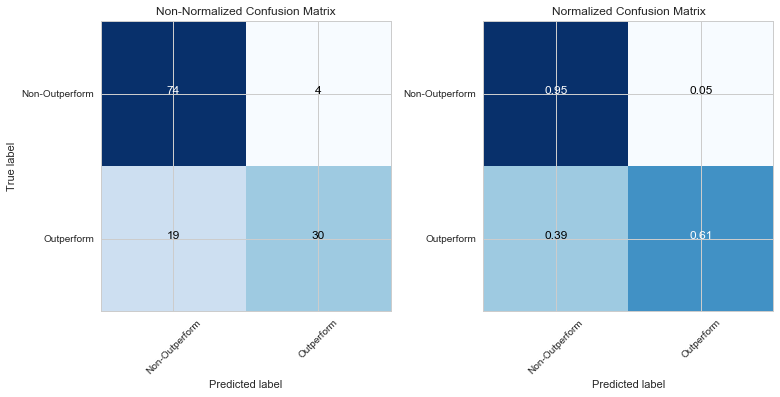

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score, f1_score

import numpy as np
import pandas as pd

# Generate a 60/40 training/test split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# Generate & train instance of RandomForest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Print classification metrics & confusion matrix (normalized & non)
print("Precision: %0.2f" % precision_score(y_test, rf.predict(X_test)))
print("Accuracy: %0.2f" % accuracy_score(y_test, rf.predict(X_test)))
print("Recall: %0.2f" % recall_score(y_test, rf.predict(X_test)))

rf_precision = precision_score(y_test, rf.predict(X_test))
rf_recall = recall_score(y_test, rf.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))

# Calc and plot confusion matrices
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(figsize = (11, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cm, ['Non-Outperform', 'Outperform'])
plt.title("Non-Normalized Confusion Matrix")
plt.subplot(1, 2, 2)
plot_confusion_matrix(cm, ['Non-Outperform', 'Outperform'], normalize=True)
plt.title("Normalized Confusion Matrix")
plt.ylabel("")
plt.show()


In our scenario, the risk of a false positive is great. A false positive would mean indicating a school is likely to outperform when it actually is not. If this model were being used to help direct funds to in-need schools, a false positive would result in a school who really needs help being passed over for additional funding. Conversely, a false negative, where a school is labeled as non-outperform when it actually is doing well doesn't matter too much. The school won't receive additional funding, but they don't need it anyway. Precision is defined as $\frac{TP}{TP+FP}$ where TP are true positives and FP are false positives. Looking at this formula, you can tell that precision optimizes for reducing false positives. As your FP value goes to 0, the precision score will approach 1 because the numerator and denomitor are equal.

Looking across the top row of the confusion matrixes above, it can be seen that for a school who's true label is "Non-Outperform", there is a 95% chance of it being correctly labeled.

## Regression Task

### Ordinary Least Squares (OLS)

Oridinary Least Squares (OLS) Regression is the standard form of regression well known to students, academics, and industry professionals alike. While it isn't cutting edge, it's a powerful technique used by a huge number of statisticians and data scientists, and always a great place to start a regression analysis. In OLS regression we attempt to estimate the parameters in a linear model by minimizing the sum of squared residuals. 

In [17]:
from  sklearn.model_selection  import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Remove additional columns for regression tasks
todrop=hs_2017.columns[hs_2017.columns.str.lower().str.contains('graduation')]
x = x.drop(columns = todrop.values)
x_scaled = preprocessing.scale(x)
y=hs_2017['GraduationRate_5yr_All']

lr = linear_model.LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: -17.80 (+/- 14.60)


### LASSO Regression

Least Absolute Shrinkage and Selection Operator (LASSO) is a method of linear regression that uses shrinkage to reduce the dimensionality to create a more parsimonious model that best describes the relationship to the predicted variable.  LASSO introduces bias to the model as a penalty to the absolute value of the magnitude of the coefficients.  This bias penalty is aimed at reducing the size of the model to create the simplest model possible.  Thus LASSO is typically far easier to interpret than most other regression models.

In [18]:
import pandas as pd

# Remove additional columns for regression tasks
hs_2017 = pd.read_csv("https://github.com/jeffweltman/MSDS7331/raw/master/hs_2017.csv",index_col=0)

Y=hs_2017['GraduationRate_5yr_All'].values
todrop=hs_2017.columns[hs_2017.columns.str.lower().str.contains('graduation')]
X_highSchools = hs_2017.drop(columns = todrop.values)

In [19]:
from sklearn.preprocessing import StandardScaler

# Standardize the data to a more normally distributed data
scaler = StandardScaler()
scaler.fit(X_highSchools)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.40, random_state=0)

In [21]:
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

# Define function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#define Function for Mean Absolute Percentage Error (MAPE)
#From: https://github.com/jakemdrew/EducationDataNC/blob/master/Other%20Projects/iPython%20Notebooks/Machine%20Learning/Graduation%20Rates%20February%202018%20-%205%20Years%20Expanded.ipynb
#Adapted from: https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y, y_pred): 
    mask = y != 0
    return (np.fabs(y - y_pred)/y)[mask].mean() * 100

#Scoring functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Array created to score individual folds
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

In [22]:
from  sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    #From: https://github.com/jakemdrew/EducationDataNC/blob/master/Other%20Projects/iPython%20Notebooks/Machine%20Learning/Graduation%20Rates%20February%202018%20-%205%20Years%20Expanded.ipynb
    #Adapted from: https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

In [23]:
#Create a regression object and perform a grid search to find the best parameters#Create a 
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_highSchools, Y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    5.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.4, train_size=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=True, positive=False, precompute=True, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'alpha': [0.001, 0.1, 1, 10, 20], 'selection': ['cyclic', 'random'], 'warm_start': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=1)

In [24]:
#Display the best estimator parameters#Display  
regGridSearch.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=True, positive=False, precompute=True, random_state=0,
   selection='random', tol=0.0001, warm_start=True)

In [25]:
import numpy as np

#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_highSchools, Y, cv)

The average MAE for all cv folds is: 			 5.6128
The average MAE percentage (MAPE) for all cv folds is: 	 5.0829
The average RMSE for all cv folds is: 			 11.479
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,5.367032,4.327526,12.718617
1,5.810164,5.346502,11.926632
2,5.444527,5.478088,9.840290
3,5.881968,5.117440,12.052784
4,5.718674,4.757884,12.971075
5,6.021267,5.184819,12.465273
6,5.548861,5.619957,9.082170
7,5.512639,4.624240,12.062850
8,5.144754,4.608137,11.390945
9,5.678368,5.764606,10.282671


In [26]:
from sklearn import linear_model, preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

scores = cross_val_score(reg, X_highSchools, Y, cv=10, scoring='r2')
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: -0.05 (+/- 0.11)


### Huber Regression

The Huber Regression model was selected as a regression model due to its being robust to outliers. We performed a grid search to determine the optimal epsilon - which measures the robustness to outliers - as well as alpha, the regularization parameter. This yielded 560 possible combinations of models.

In [27]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import HuberRegressor 
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

reg = HuberRegressor(epsilon=1.50,fit_intercept=True, alpha=0.001, max_iter=100)
# top_feat = SelectKBest(score_func=chi2, k=75)

# pipe = Pipeline([('feature', top_feat), ('huber',reg)])

#Test parameters 
epsilon_range = np.arange(1.0, 2.0, 0.05)
alpha_options = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.05, 0.01]
warm_start = [True, False]
fit_intercept = [True, False]
parameters = {'epsilon': epsilon_range, 'alpha': alpha_options, 'warm_start': warm_start, 'fit_intercept': fit_intercept}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=2 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data

regGridSearch.fit(X_highSchools, Y)

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=2)]: Done  72 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 372 tasks      | elapsed:   14.4s
[Parallel(n_jobs=2)]: Done 872 tasks      | elapsed:   32.4s
[Parallel(n_jobs=2)]: Done 1572 tasks      | elapsed:   58.5s
[Parallel(n_jobs=2)]: Done 2472 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 3572 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 4872 tasks      | elapsed:  3.0min
[Parallel(n_jobs=2)]: Done 5600 out of 5600 | elapsed:  3.5min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.4, train_size=None),
       error_score='raise',
       estimator=HuberRegressor(alpha=0.001, epsilon=1.5, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'epsilon': array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95]), 'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.05, 0.01], 'warm_start': [True, False], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=1)

In [28]:
#Display the best estimator parameters
regGridSearch.best_estimator_

HuberRegressor(alpha=1e-05, epsilon=1.4500000000000004, fit_intercept=False,
        max_iter=100, tol=1e-05, warm_start=True)

In [29]:
#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_highSchools, Y, cv)

The average MAE for all cv folds is: 			 6.0188
The average MAE percentage (MAPE) for all cv folds is: 	 5.4965
The average RMSE for all cv folds is: 			 11.853
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,6.361301,5.484044,13.211558
1,5.973560,5.505657,11.988617
2,5.564955,5.609910,9.747020
3,6.477613,5.552352,13.180311
4,6.328034,5.405231,13.767458
5,6.761688,5.847074,14.118633
6,5.188718,5.297551,8.816946
7,6.620796,5.699031,13.675008
8,5.634532,5.184235,11.088666
9,5.276503,5.379934,8.934451


This model yielded an RMSE of 12.073.

# 6. Data and Evaluation 4
## Results

# 7. Data and Evaluation 5
## Advantages and Disadvantages

# 8. Data and Evaluation 6
## Most Important Attributes

### Huber Regression

We examined the coefficients of the Huber Regression model to determine which attributes were the most important.

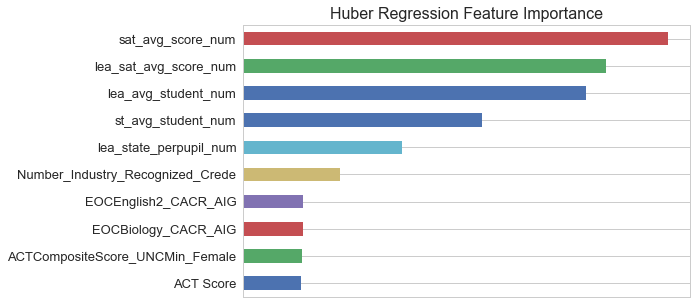

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

huber_imps = pd.DataFrame({"feature":X_highSchools.columns})
huber_imps['fscore'] = np.transpose(regGridSearch.best_estimator_.coef_.ravel())
huber_imps['fscore'] = huber_imps['fscore'] / huber_imps['fscore'].max()
huber_imps.sort_values('fscore', ascending = False, inplace = True)
huber_imps = huber_imps[0:10]
huber_imps.sort_values('fscore', ascending = True, inplace = True)
huber_imps.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(8, 5))
plt.title('Huber Regression Feature Importance', fontsize = 16)
plt.xlabel('')
plt.ylabel('')
plt.xticks([], [])
plt.yticks(fontsize=13)
plt.show()

When examining the ten most important features of the Huber Regression model, we can see from the top four features that graduation rate is influenced largely simply by the number of students at the school compared to the district (lea) and state level. This follows logically, as a school's relative student population size will be a contributing factor to the percentage of that population which graduates. Five of the six remaining features in the top 10 are derived from end of course scores or ACT score-related attributes, as positive results in these academic areas should be reflected by a stable or increasing graduation rate. Lastly, the fifth-most important feature is *Number_Industry_Recognized_Crede*. This is the industry-recognized credentials earned by students, which is also an identifier of academic success and therefore logically translates to graduation rate.

### K-Nearest Neighbors

Feature importance cannot be as easily ascertained for K-Neighbors classifiers. These classifiers compute distance and look to nearby points to determine class label. Our research indicated that utilizing alternative methods, such as simulated annealing, might be able to yield useful insight in this regard, but with the computational expense being greater than the benefit of the obtained information. See the following R-bloggers article for a lengthier explanation and a demonstration of this in R: https://www.r-bloggers.com/simulated-annealing-feature-selection/

### Logistic Regression

# 9. Deployment

# 10. Exceptional Work

## Random Forest Grid Search

In the earlier random forest model, we used the default parameters provided by `scikit-learn`, but those are not necessarily optimal. The defaults for the main parameters are as follows: n_estimators=10, criterion=gini, max_features=auto, max_depth=none. Using the default parameters for a powerful algorithm like random forest is the equivalent of buying a 65 inch 4K HDTV, then playing a VHS tape on it.

While it's good we have "knobs" to turn on the algorithm, it can be daunting to come up with the optimal set of parameters. Where to start? One option is grid search. In grid search, you take the cartesian product for a set of possible parameter values, and re-run your model for each set of parameters. One of those sets of parameters will have best results, and that is your result. The downside of this approach is that the number of iterations can grow very quickly as you increase the number of parameters & options in your grid, increasing the computational overhead of the model building. Secondly, this method does not guarantee arriving at a global maximum. With those caveats in mind, let's see if/by how much we can increase our model quality.

In [36]:
# With grid search

param_grid = {
    'n_estimators': [5, 25, 50, 100, 150],
    'max_depth':    [int(i) for i in range(2,11)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':    ['gini', 'entropy'],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

# Generate & fit RandomForest with grid search per the above
from sklearn.model_selection import GridSearchCV
rfgc = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rfgc, param_grid, cv=10, scoring="precision")
# Careful with the below line of code, it can take a long time to run.
#
#grid_rf.fit(X_train, y_train)

In [37]:
print("\n\n Parameters from best model:\n", grid_rf.best_params_)
print("\nPrecision: %0.2f" % precision_score(y_test, grid_rf.predict(X_test)))
print("Accuracy: %0.2f" % accuracy_score(y_test, grid_rf.predict(X_test)))
print("Recall: %0.2f" % recall_score(y_test, grid_rf.predict(X_test)))

crit = 'gini'
max_depth = 7
max_eatures = 'auto'
min_samples_leaf = 4
n_estimators = 100


cm = confusion_matrix(y_test, grid_rf.predict(X_test))
plt.figure(figsize = (11, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cm, ['Non-Outperform', 'Outperform'])
plt.title("Non-Normalized Confusion Matrix")
plt.subplot(1, 2, 2)
plot_confusion_matrix(cm, ['Non-Outperform', 'Outperform'], normalize=True)
plt.title("Normalized Confusion Matrix")
plt.ylabel("")
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Our grid search took overnight to complete, but barely yielded better results than 

### Scaling Pipeline

Although the StandardScaler was used above to normalize the data, that operates under the assumption that the data in our set is well-suited to a standard normal distribution. We therefore combined a **for** loop with a Pipeline to cycle through the data utilizing different scalers.

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
#KNN 10-fold cross-validation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import jaccard
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

class_cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

knc = KNeighborsClassifier(n_neighbors=5)

scales = {RobustScaler(quantile_range=(25, 75)),
         StandardScaler(),
         MinMaxScaler(),
         MaxAbsScaler(),
         QuantileTransformer(output_distribution='uniform'),
         QuantileTransformer(output_distribution='normal'),
         Normalizer()}

k_range = list(range(1, 30))
metrics = ['euclidean','chebyshev','manhattan','minkowski','jaccard']
weights_options = ['uniform','distance']

knn_parameters = {'kneighborsclassifier__n_neighbors': k_range,'kneighborsclassifier__weights': weights_options, 'kneighborsclassifier__metric': metrics}

#Create a grid search object using the defined parameters
for i in scales:
    scaled_knn_pipe = make_pipeline(i, knc)
    kGridSearch = GridSearchCV(scaled_knn_pipe,param_grid=knn_parameters,n_jobs=4,verbose=1,cv=class_cv,scoring='precision')

#Perform hyperparameter search to find the best combination of parameters for our data
kGridSearch.fit(X_Class, Y_Class)

Fitting 10 folds for each of 290 candidates, totalling 2900 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   30.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 2900 out of 2900 | elapsed:  7.4min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('quantiletransformer', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'kneighborsclassifier__weights': ['uniform', 'distance'], 'kneighborsclassifier__metric': ['euclidean', 'chebyshev', 'manhattan', 'minkowski', 'jaccard']},
       pre_dispatch='2*n_jobs', refit=True, return_train_s

In [38]:
kGridSearch.best_estimator_

Pipeline(memory=None,
     steps=[('quantiletransformer', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform'))])

In [39]:
EvaluateClassifierEstimator(kGridSearch.best_estimator_, X_Class, Y_Class, class_cv)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

The GridSearch determined that the best scaler to use with K-Nearest Neighbors and our data set was a normally distributed quantile transformed scaler. Although precision and accuracy both decreased slightly compared to the standard scaled model above, the recall increased by over 10%. This is indicative of a more balanced model overall.